## Logistic Regression
 - Logistic regression is a linear model for classification rather than regression
 - Sigmoid function: $p = \frac{1}{(1+e^{-y})}$
 -  Linear regression equation: $\hat{y}$(${w,x}$) = $w_{0}$ + $w_{1}$$x_{1}$ + $w_{2}$$x_{2}$ + ... + $w_{p}$$x_{p}$
 - Applying sigmoid function: $p = \frac{1}{(1+e^{-(w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{p}x_{p})})}$
 - Types of Logistic Regression
  - Binary Logistic Regression: target variable has only two possible outcomes
  - Multinomial Logistic Regression: Target variable has three or more nominal categories
  - Ordinal Logistic Regression: Target variable has three of more ordinal categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

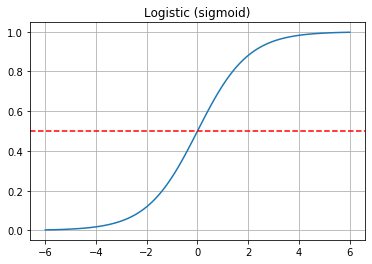

In [2]:
def logistic(x): 
    return 1 / (1 + np.exp(-x))

x = np.linspace(-6, 6, 100) 
plt.plot(x, logistic(x)) 
plt.axhline(.5, c='r', ls='--')
plt.grid(True) 
plt.title('Logistic (sigmoid)');

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn import datasets

from sklearn import metrics

#### Logistic versus Linear Regression

In [4]:
# Generate a sample dataset - a straight line with some Gaussian noise:

np.random.seed(123)

xmin, xmax = -5, 5
n_samples = 100

X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)

# Noise commented out

# X[X > 0] *= 4
# X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]  # or X.reshape(-1,1)
X[:10]

array([[-1.0856],
       [ 0.9973],
       [ 0.283 ],
       [-1.5063],
       [-0.5786],
       [ 1.6514],
       [-2.4267],
       [-0.4289],
       [ 1.2659],
       [-0.8667]])

In [5]:
y[:10]

array([0., 1., 1., 0., 0., 1., 0., 0., 1., 0.])

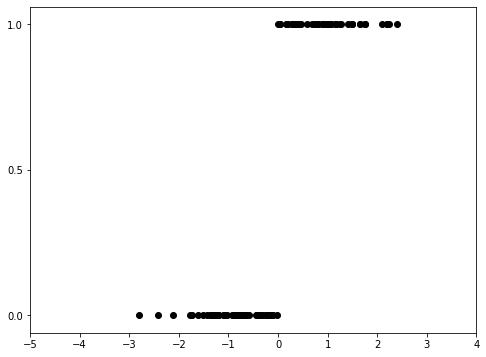

In [6]:
plt.figure(figsize=(8, 6))

plt.scatter(X.ravel(), y, color='k')
plt.xticks(range(-5, 5))
plt.yticks([0, 0.5, 1]);

In [7]:
# Fit the Logistic classifier and the Linear regression

clf = LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)

[[230.1743]]
[1.0355]


In [8]:
ols = LinearRegression()
ols.fit(X, y)

print(ols.coef_)
print(ols.intercept_)

[0.3731]
0.47988653768628625


In [95]:
def model(x):
    return 1 / (1 + np.exp(-x))

X_test = np.linspace(-5, 5, 300)

print('X_test:\n{}'.format(X_test))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()

print('loss:\n{}'.format(loss))


X_test:
[-5.     -4.9666 -4.9331 -4.8997 -4.8662 -4.8328 -4.7993 -4.7659 -4.7324
 -4.699  -4.6656 -4.6321 -4.5987 -4.5652 -4.5318 -4.4983 -4.4649 -4.4314
 -4.398  -4.3645 -4.3311 -4.2977 -4.2642 -4.2308 -4.1973 -4.1639 -4.1304
 -4.097  -4.0635 -4.0301 -3.9967 -3.9632 -3.9298 -3.8963 -3.8629 -3.8294
 -3.796  -3.7625 -3.7291 -3.6957 -3.6622 -3.6288 -3.5953 -3.5619 -3.5284
 -3.495  -3.4615 -3.4281 -3.3946 -3.3612 -3.3278 -3.2943 -3.2609 -3.2274
 -3.194  -3.1605 -3.1271 -3.0936 -3.0602 -3.0268 -2.9933 -2.9599 -2.9264
 -2.893  -2.8595 -2.8261 -2.7926 -2.7592 -2.7258 -2.6923 -2.6589 -2.6254
 -2.592  -2.5585 -2.5251 -2.4916 -2.4582 -2.4247 -2.3913 -2.3579 -2.3244
 -2.291  -2.2575 -2.2241 -2.1906 -2.1572 -2.1237 -2.0903 -2.0569 -2.0234
 -1.99   -1.9565 -1.9231 -1.8896 -1.8562 -1.8227 -1.7893 -1.7559 -1.7224
 -1.689  -1.6555 -1.6221 -1.5886 -1.5552 -1.5217 -1.4883 -1.4548 -1.4214
 -1.388  -1.3545 -1.3211 -1.2876 -1.2542 -1.2207 -1.1873 -1.1538 -1.1204
 -1.087  -1.0535 -1.0201 -0.9866 -0.9532 -0

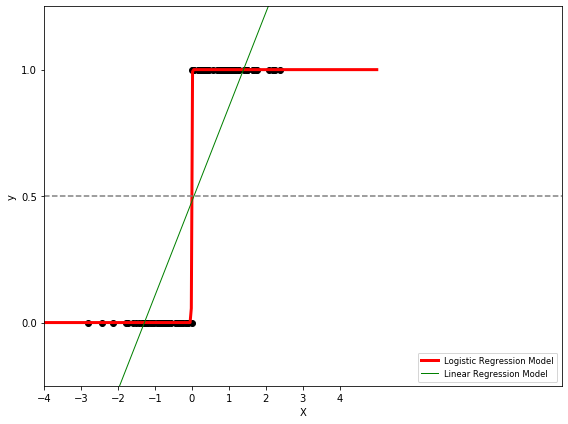

In [10]:
plt.figure(figsize=(8, 6))

plt.scatter(X.ravel(), y, color='k')

plt.plot(X_test, loss, color='r', linewidth=3)

plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1, color='g')

plt.axhline(.5, c='gray', ls='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 5))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()

In [11]:
# Generate a sample dataset - a straight line with some Gaussian noise:

np.random.seed(123)

xmin, xmax = -5, 5
n_samples = 100

X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)

# With Noise 

X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

np.min(X), np.max(X)

(-3.1286020392469336, 9.706342332311573)

In [12]:
X = X[:, np.newaxis]  # or X.reshape(-1,1)
X[:10]

array([[-0.893 ],
       [ 3.396 ],
       [ 1.3456],
       [-0.7268],
       [-0.586 ],
       [ 6.616 ],
       [-2.3728],
       [-0.9875],
       [ 5.1916],
       [-1.3484]])

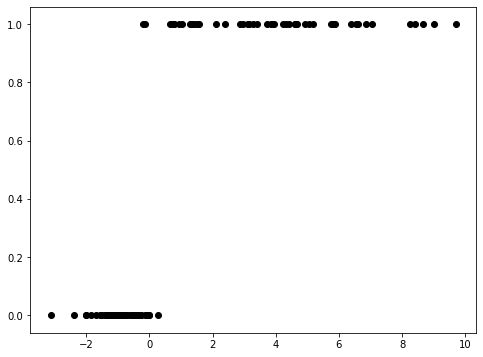

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter(X.ravel(), y, color='k');

In [14]:
# Fit the Logistic classifier and the Linear regression

clf = LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)

[[5.4187]]
[-1.1437]


In [15]:
ols = LinearRegression()
ols.fit(X, y)

print(ols.coef_)
print(ols.intercept_)

[0.1317]
0.29434790257445975


In [16]:
def model(x):
    return 1 / (1 + np.exp(-x))

X_test = np.linspace(-5, 10, 300)

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()

loss


array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.0001, 0.0001, 0.0001, 0.0001,
       0.0002, 0.0002, 0.0003, 0.0004, 0.0005, 0.0007, 0.0009, 0.0012,
       0.0015, 0.002 , 0.0026, 0.0034, 0.0045, 0.0059, 0.0077, 0.0101,
       0.0132, 0.0172, 0.0225, 0.0293, 0.0381, 0.0495, 0.0639, 0.0822,
       0.1052, 0.1337, 0.1684, 0.21  , 0.2586, 0.314 , 0.3753, 0.4409,
       0.5086, 0.5759, 0.6406, 0.7005, 0.7543, 0.8011, 0.8409, 0.874 ,
      

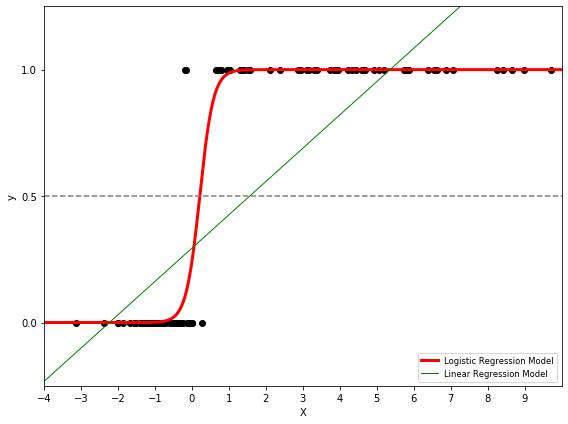

In [17]:
plt.figure(figsize=(8, 6))

plt.scatter(X.ravel(), y, color='k')

plt.plot(X_test, loss, color='r', linewidth=3)

plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, 
         linewidth=1, color='g')

plt.axhline(.5, c='gray', ls='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()

## Iris Dataset

In [18]:
iris = datasets.load_iris()

In [19]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
X = iris.data[:, :2]  # Using the first two features.
y = iris.target

In [21]:
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [22]:
np.unique(y)

array([0, 1, 2])

### Binary Logistic Regression

In [23]:
# Use only the first two classes

X = X[y != 2]
y = y[y != 2]

In [24]:
logreg = LogisticRegression()

logreg.fit(X, y);

/Users/mcorbett/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
logreg.score(X, y)

0.99

In [26]:
y_pred = logreg.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
metrics.confusion_matrix(y, y_pred)

array([[49,  1],
       [ 0, 50]])

In [28]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] by [y_min, y_max].

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

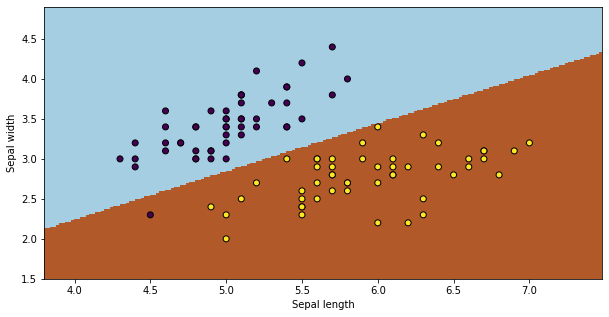

In [29]:
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max());

### Multinomial Logistic Regression

In [30]:
# Using All the features

In [31]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [32]:
logreg.fit(iris.data, iris.target)

/Users/mcorbett/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
iris_probs = logreg.predict_proba(iris.data)
iris_probs[:5]

array([[0.9818, 0.0182, 0.    ],
       [0.9717, 0.0283, 0.    ],
       [0.9855, 0.0145, 0.    ],
       [0.9763, 0.0237, 0.    ],
       [0.9854, 0.0146, 0.    ]])

In [34]:
iris_pred = logreg.predict(iris.data)
iris_pred[:5]

array([0, 0, 0, 0, 0])

In [35]:
metrics.confusion_matrix(iris.target, iris_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [36]:
iris_pred_df = pd.DataFrame(iris_probs, columns=iris.target_names).round(4)
iris_pred_df['predicted_class'] = iris.target_names[iris_pred]
iris_pred_df['target_class'] = iris.target_names[iris.target]
iris_pred_df.sample(12)

,setosa,versicolor,virginica,predicted_class,target_class
11,0.9754,0.0246,0.0000,setosa,setosa
64,0.0743,0.9152,0.0105,versicolor,versicolor
146,0.0002,0.2502,0.7495,virginica,virginica
111,0.0001,0.1369,0.8631,virginica,virginica
116,0.0001,0.1233,0.8767,virginica,virginica
68,0.0018,0.7992,0.1990,versicolor,versicolor
122,0.0000,0.0047,0.9953,virginica,virginica
139,0.0000,0.0934,0.9066,virginica,virginica
45,0.9739,0.0261,0.0000,setosa,setosa
34,0.9687,0.0313,0.0000,setosa,setosa


In [37]:
logreg.score(iris.data, iris.target)

0.9733333333333334

In [38]:
iris_pred_df[iris_pred != iris.target]

,setosa,versicolor,virginica,predicted_class,target_class
70,0.0023,0.4403,0.5574,virginica,versicolor
77,0.0006,0.4811,0.5183,virginica,versicolor
83,0.0004,0.3496,0.6500,virginica,versicolor
106,0.0057,0.5117,0.4826,versicolor,virginica


In [39]:
print("Accuracy:",metrics.accuracy_score(iris.target, iris_pred))


Accuracy: 0.9733333333333334


### Model Validation
 - Divide the dataset into a training set and a test set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [43]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [44]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
logreg.score(X_test, y_test)

0.9777777777777777

In [47]:
metrics.confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [48]:
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

### Case Study - Predicting Credit Card Default
 - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
 - http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html
 

In [49]:
ccd = pd.read_csv('http://people.bu.edu/kalathur/datasets/credit_card_default.csv',
                 index_col="ID")
ccd.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [50]:
len(ccd)

30000

In [51]:
ccd.rename(columns=lambda x: x.lower(), inplace=True)
ccd.rename(columns={'default payment next month':'default'}, inplace=True)

ccd.head().T

ID,1,2,3,4,5
limit_bal,20000,120000,90000,50000,50000
sex,2,2,2,2,1
education,2,2,2,2,2
marriage,1,2,2,1,1
age,24,26,34,37,57
pay_1,2,-1,0,0,-1
pay_2,2,2,0,0,0
pay_3,-1,0,0,0,-1
pay_4,-1,0,0,0,0
pay_5,-2,0,0,0,0


In [52]:
# getting the groups of features

bill_amt_features = ['bill_amt'+ str(i) for i in range(1,7)]

pay_amt_features = ['pay_amt'+ str(i) for i in range(1,7)]

numerical_features = ['limit_bal','age'] + bill_amt_features + pay_amt_features

In [53]:
numerical_features

['limit_bal',
 'age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6']

In [54]:
ccd.sex.unique()

array([2, 1])

In [55]:
ccd.sex.value_counts()

2    18112
1    11888
Name: sex, dtype: int64

In [56]:
ccd.education.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [57]:
ccd.education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [58]:
# Creating  some binary features

ccd['male'] = (ccd['sex'] == 1).astype('int')

ccd['grad_school'] = (ccd['education'] == 1).astype('int')
ccd['university'] = (ccd['education'] == 2).astype('int')

ccd['married'] = (ccd['marriage'] == 1).astype('int')


In [59]:
ccd.head().T

ID,1,2,3,4,5
limit_bal,20000,120000,90000,50000,50000
sex,2,2,2,2,1
education,2,2,2,2,2
marriage,1,2,2,1,1
age,24,26,34,37,57
pay_1,2,-1,0,0,-1
pay_2,2,2,0,0,0
pay_3,-1,0,0,0,-1
pay_4,-1,0,0,0,0
pay_5,-2,0,0,0,0


In [60]:
# simplifying pay features 

pay_features= ['pay_' + str(i) for i in range(1,7)]

In [61]:
pay_features

['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [62]:
ccd['pay_1'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [63]:
ccd.loc[ccd['pay_1'] > 0].T

ID,1,14,16,19,20,23,27,32,39,51,...,29963,29967,29974,29975,29977,29982,29992,29995,29998,29999
limit_bal,20000,70000,50000,360000,180000,70000,60000,50000,50000,70000,...,50000,150000,230000,50000,40000,50000,210000,80000,30000,80000
sex,2,1,2,2,2,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
education,2,2,3,1,1,2,1,2,1,3,...,2,5,2,2,2,2,2,2,2,3
marriage,1,2,3,1,2,2,2,2,2,2,...,2,2,1,1,2,1,1,2,2,1
age,24,30,23,49,29,26,27,33,25,42,...,30,31,35,37,47,44,34,34,37,41
pay_1,2,1,1,1,1,2,1,2,1,1,...,1,2,1,1,2,1,3,2,4,1
pay_2,2,2,2,-2,-2,0,-2,0,-1,2,...,-1,0,-2,2,2,2,2,2,3,-1
pay_3,-1,2,0,-2,-2,0,-1,0,-1,2,...,2,0,-2,2,3,2,2,2,2,0
pay_4,-1,0,0,-2,-2,2,-1,0,-2,2,...,-1,0,-2,2,2,2,2,2,-1,0
pay_5,-2,0,0,-2,-2,2,-1,0,-2,2,...,-1,-2,-2,0,2,0,2,2,0,0


In [64]:
for x in pay_features:
    ccd.loc[ccd[x] <= 0, x] = 0

In [65]:
# simplifying delayed features

delayed_features = ['delayed_' + str(i) for i in range(1,7)]


In [66]:
for pay, delayed in zip(pay_features, delayed_features):
    ccd[delayed] = (ccd[pay] > 0).astype(int)

In [67]:
# creating a new feature: months delayed
ccd['months_delayed'] = ccd[delayed_features].sum(axis=1)

In [68]:
ccd.head().T

ID,1,2,3,4,5
limit_bal,20000,120000,90000,50000,50000
sex,2,2,2,2,1
education,2,2,2,2,2
marriage,1,2,2,1,1
age,24,26,34,37,57
pay_1,2,0,0,0,0
pay_2,2,2,0,0,0
pay_3,0,0,0,0,0
pay_4,0,0,0,0,0
pay_5,0,0,0,0,0


In [69]:
ccd['months_delayed'].value_counts()

0    19931
1     4426
2     1899
6     1341
3     1154
4      951
5      298
Name: months_delayed, dtype: int64

#### Splitting the dataset

In [70]:
numerical_features = numerical_features + ['months_delayed']
binary_features = ['male','married','grad_school','university']

X = ccd[numerical_features + binary_features]
y = ccd['default'].astype(int)

In [71]:
X[:10]

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,months_delayed,male,married,grad_school,university
ID,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,2,0,1,0,1
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,2,0,0,0,1
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,1
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,1,0,1
6,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1,0,1,0
7,500000,29,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,1,0,1,0
8,100000,23,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0,0,0,1
9,140000,28,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,1,0,1,0,0


In [72]:
y[:10]

ID
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: default, dtype: int64

In [73]:
# 1. Import the class you will use
from sklearn.preprocessing import StandardScaler

# 2. Create an instance of the class
scaler = StandardScaler()

# 3. Use the fit method of the instance
scaler.fit(X[numerical_features])

X.loc[:,numerical_features] = scaler.transform(X[numerical_features])

/Users/mcorbett/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [74]:
X

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,months_delayed,male,married,grad_school,university
ID,,,,,,,,,,,,,,,,,,,
1,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,0.750059,0,1,0,1
2,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,0.750059,0,0,0,1
3,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.536713,0,0,0,1
4,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.536713,0,1,0,1
5,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.536713,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,-0.536713,1,1,0,0
29997,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.536713,1,0,0,0
29998,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1.393445,1,0,0,1


In [75]:
len(X)

30000

In [76]:
X[:10]

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,months_delayed,male,married,grad_school,university
ID,,,,,,,,,,,,,,,,,,,
1,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,0.750059,0,1,0,1
2,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,0.750059,0,0,0,1
3,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.536713,0,0,0,1
4,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.536713,0,1,0,1
5,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.536713,1,1,0,1
6,-0.905498,0.164303,0.178947,0.110856,0.152777,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381,-0.536713,1,0,1,0
7,2.562830,-0.703588,4.301531,5.098086,5.739063,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207,-0.536713,1,0,1,0
8,-0.520128,-1.354506,-0.534359,-0.685644,-0.669262,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642,-0.536713,0,0,0,1
9,-0.211833,-0.812074,-0.542385,-0.492930,-0.503332,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130,0.106673,0,1,0,0


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=5/30, random_state=43)

In [78]:
len(X_train), len(y_train)

(25000, 25000)

In [79]:
X_train[:10]

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,months_delayed,male,married,grad_school,university
ID,,,,,,,,,,,,,,,,,,,
20794,-1.136720,-0.161156,-0.690345,-0.685504,-0.666681,-0.660373,-0.663059,-0.652724,-0.318395,-0.223136,-0.296801,-0.308063,-0.314136,-0.293382,0.750059,1,0,0,1
27423,0.019389,-0.486615,1.640378,1.668479,0.997514,2.313305,1.312017,0.902073,9.802293,-0.039980,0.043979,0.146747,0.013131,-0.040248,-0.536713,1,0,0,1
1376,-1.059646,1.574625,-0.695642,-0.690983,-0.677929,-0.672497,-0.546406,-0.538003,-0.341942,-0.256990,-0.296801,0.144640,-0.314136,-0.293382,0.106673,0,0,0,0
25681,0.944277,-0.486615,3.169156,3.160486,3.290002,2.270900,2.514166,2.660335,0.261814,0.198296,0.079193,0.119618,0.144038,0.108819,-0.536713,0,1,0,1
20200,0.635981,0.923707,-0.377341,-0.690983,-0.622412,-0.672497,-0.125360,-0.029062,-0.341942,-0.089892,-0.296801,1.778635,0.013131,-0.012122,-0.536713,0,0,0,1
26945,1.560869,-0.595102,3.839317,3.253330,3.441931,3.924717,3.451643,3.645221,0.442940,0.220431,0.555149,0.330267,0.340398,0.381641,-0.536713,1,0,1,0
3050,0.327685,0.164303,-0.669975,-0.648313,-0.642903,-0.659704,-0.645146,-0.628359,-0.158581,-0.204907,-0.296801,-0.238549,-0.235527,-0.235386,0.106673,1,0,0,1
17952,0.019389,0.055816,1.463043,1.268788,1.338979,1.503037,1.663257,1.865129,-0.341519,0.025687,0.075103,0.030252,0.405916,-0.293382,0.750059,1,1,0,1
8839,0.404759,0.598248,-0.607151,-0.688258,-0.625743,-0.562614,-0.595752,-0.652724,-0.341942,-0.098356,0.104694,-0.046858,-0.314136,-0.293382,0.750059,0,1,0,1


In [80]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5, solver='lbfgs')

logreg.fit(X_train['months_delayed'].values.reshape(-1, 1), y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
print("W0: {}, W1: {}".format(logreg.intercept_[0], logreg.coef_[0][0]))

W0: -1.3922007420719218, W1: 0.8218996618737072


In [82]:
def get_probs(months_delayed):
    m = scaler.mean_[-1]
    std = scaler.var_[-1]**.5
    x = (months_delayed - m)/std
    prob_default = 1/(1+np.exp(-logreg.intercept_[0] + -logreg.coef_[0][0]*x))
    return prob_default

In [83]:
months = np.arange(13)
pred_probs = get_probs(months)
pd.DataFrame({'months': months, 'pred_probs':pred_probs})

,months,pred_probs
0,0,0.137843
1,1,0.213404
2,2,0.315241
3,3,0.438580
4,4,0.570005
5,5,0.692252
6,6,0.792402
7,7,0.866258
8,8,0.916603
9,9,0.949110


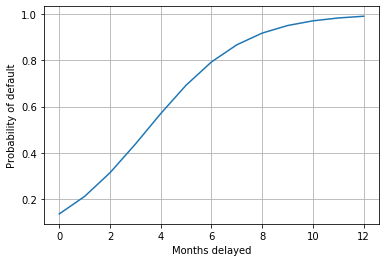

In [84]:
plt.plot(months, pred_probs)
plt.xlabel('Months delayed')
plt.ylabel('Probability of default')
plt.grid()

In [85]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([19507,  5493]))

In [86]:
y_pred = logreg.predict(X_train['months_delayed'].values.reshape(-1, 1))
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([22862,  2138]))

In [87]:
accuracy_logreg = metrics.accuracy_score(y_train, y_pred)
accuracy_logreg

0.80412

In [88]:
metrics.confusion_matrix(y_train, y_pred)

array([[18736,   771],
       [ 4126,  1367]])

In [89]:
# Using test data

In [90]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([3857, 1143]))

In [91]:
y_pred = logreg.predict(X_test['months_delayed'].values.reshape(-1, 1))
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([4548,  452]))

In [92]:
metrics.accuracy_score(y_test, y_pred)

0.7978

In [93]:
metrics.confusion_matrix(y_test, y_pred)

array([[3697,  160],
       [ 851,  292]])